In [1]:
import sys
import librosa
import numpy as np
import soundfile as sf
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/bandwidth_extension/shannon_scripts')
import audio_unet as au
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/utilities/')
import utility_spectrogram as us

/Users/omkarpatil/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
duration = 3
orignal_freq = 2200
target_freq = 4096
audio_filepath = '/Volumes/Omkar 5T/dataset/window_dataset/chips2/filtered_chips2.wav'

In [3]:
audio, _ = sf.read(audio_filepath)
audio = librosa.resample(audio, orig_sr=orignal_freq, target_sr=target_freq)

total_length = len(audio)
num_sections = total_length//int(target_freq)
audio = np.array(audio[:int(num_sections*target_freq)])
audio = audio.reshape((num_sections, int(target_freq)))
audio = audio[:, :, np.newaxis]

In [4]:
weights_path = '/Users/omkarpatil/Documents/event_based_visual_microphone/bandwidth_extension/weights_file/aunet.h5'

In [5]:
audio_unet = au.AudioUNet(block_size=5).load(weights_path)
prediction = audio_unet.predict(audio)
prediction = np.squeeze(prediction).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


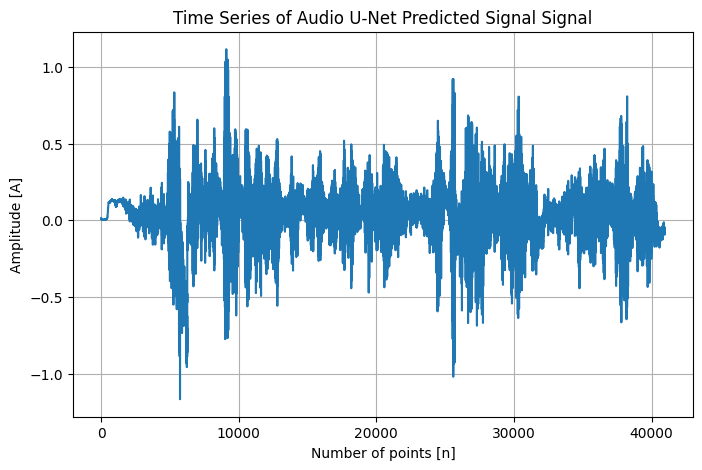

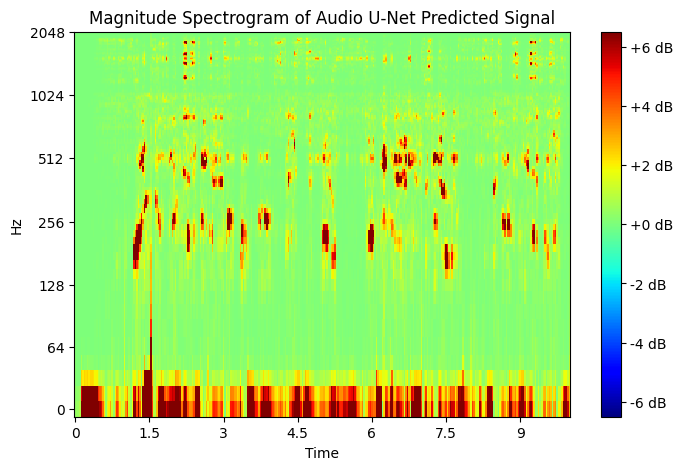

In [6]:
us.show_signal(prediction, 'Audio U-Net Predicted Signal')
us.show_spectrogram(prediction, 4096, 256, 128, 'Audio U-Net Predicted')

sf.write('chips2_extended.wav', prediction, 4096)